In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [2]:
def apply_threshold_to_img(img, threshold_type="binary"):
    if threshold_type == "binary":
        _,img = cv2.threshold(img,150, 255,cv2.THRESH_BINARY)
    elif threshold_type == "adaptive_gaussian":
        img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
    return img

In [3]:
image = cv2.imread("frente.jpeg")

In [4]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

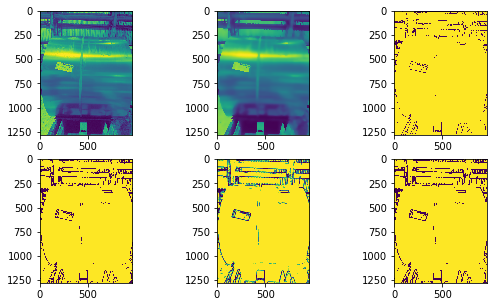

In [12]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2, 3, figsize=(9,5))

ax1.imshow(gray_img)

gray = cv2.bilateralFilter(gray_img, 30, 30, 30)
gray = cv2.bilateralFilter(gray, 30, 30, 30)

ax2.imshow(gray)

gray = apply_threshold_to_img(gray, "adaptive_gaussian")

ax3.imshow(gray)

kernel = np.ones((3,3), np.uint8)
gray = cv2.erode(gray, kernel, iterations=1)

ax4.imshow(gray)

gray = cv2.GaussianBlur(gray,(5,5),cv2.BORDER_DEFAULT)

ax5.imshow(gray)

gray = apply_threshold_to_img(gray, "binary")

high_thresh, thresh_im = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
lowThresh = 0.5*high_thresh

ax6.imshow(gray)
cv2.imwrite("frente_template.png", gray)

edged = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)

edged = cv2.Canny(edged, lowThresh, high_thresh)

edged = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, (10,10))

edged = cv2.dilate(edged, kernel, iterations=3)

plt.show()